In [7]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
#pip install keras
#!pip install tensorflow
#!pip install scikit-learn
#!pip install --upgrade tensorflow
#!pip install seaborn

# DATA SCIENCE - METODOLOGIA CRISP-DM

## CARGAMOS LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas_profiling import ProfileReport

### Analizando DataFrame

In [2]:
df = pd.read_csv('fraudTrain.csv', encoding='latin-1')
df.head(7)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   

       last gender                        street  ...      lat      long  \
0     Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1      Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2   Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3     White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4    Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
5    Conner      F             4655 David Island  ...  40.3750  -75.2045   
6  Richards      F   889 Sarah Station Suite 624  ...  37.9931 -100.9893   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   
5      2158                  Transport planner  1961-06-19   
6      2691                    Arboriculturist  1993-08-16   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  

[7 rows x 23 columns]

##### Filtrar Datos

In [3]:
df.loc[(df["gender"] == 'M') & (df["category"] == 'gas_transport'), ["first","gender","lat"]]

first gender      lat
3         Jeremy      M  46.2306
7         Steven      M  38.8432
21       Jeffrey      M  40.6866
46        Carlos      M  34.4959
52         James      M  45.7549
...          ...    ...      ...
1296610  Michael      M  38.2674
1296617   Samuel      M  38.4921
1296632   Martin      M  39.6967
1296635    James      M  31.6453
1296637    Jared      M  35.8184

[58992 rows x 3 columns]

##### Agrupaciones (analizar una variable numerica dentro de otra variable categorica) e interpretacion de datos

In [37]:
df.groupby('category')['lat'].mean()

category
entertainment     38.585850
food_dining       38.496604
gas_transport     38.801436
grocery_net       38.203587
grocery_pos       38.529579
health_fitness    38.628414
home              38.498473
kids_pets         38.518723
misc_net          38.622271
misc_pos          38.473879
personal_care     38.491020
shopping_net      38.515988
shopping_pos      38.387147
travel            38.622436
Name: lat, dtype: float64

In [41]:
# Utilizar Subgrupos, apartir de un grupo, y de ello sacar una operacion
df.groupby(['gender','category'])['lat'].mean()

gender  category      
F       entertainment     38.316877
        food_dining       38.251340
        gas_transport     38.866492
        grocery_net       38.003315
        grocery_pos       38.263226
        health_fitness    38.431132
        home              38.233780
        kids_pets         38.299994
        misc_net          38.520240
        misc_pos          38.252253
        personal_care     38.294415
        shopping_net      38.274876
        shopping_pos      38.163586
        travel            38.390478
M       entertainment     38.868699
        food_dining       38.772144
        gas_transport     38.721300
        grocery_net       38.454439
        grocery_pos       38.828805
        health_fitness    38.848072
        home              38.797229
        kids_pets         38.792918
        misc_net          38.753793
        misc_pos          38.725833
        personal_care     38.796610
        shopping_net      38.832087
        shopping_pos      38.697630
     

In [39]:
#Ordenar los resultados: ascending = False, ordena los datos de mayor a menor
df.groupby('category')['lat'].mean().sort_values(ascending = False)

category
gas_transport     38.801436
health_fitness    38.628414
travel            38.622436
misc_net          38.622271
entertainment     38.585850
grocery_pos       38.529579
kids_pets         38.518723
shopping_net      38.515988
home              38.498473
food_dining       38.496604
personal_care     38.491020
misc_pos          38.473879
shopping_pos      38.387147
grocery_net       38.203587
Name: lat, dtype: float64

## 1. ANALISIS EXPLORATORIO DE LOS DATOS

### 1.1 Status del conjunto de datos

#### 1.1.1 Estadistica descriptiva de los datos.

In [4]:
# Estadistica descriptiva de los datos.
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

#### 1.1.2 Deteccion de valores Nulos(NAN)

In [4]:
# Deteccion de valores Nulos(NAN)
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### 1.1.3 Reporte PandasProfiling

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:02<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:04<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile.to_file(output_file='EDA_Deteccion_Fraude_Tarjetas.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.2 Definir Tipo de datos 

In [3]:
# Objetc = String(Categoricos), int64 = int(Discretos), float64 = float(Continuos)
# Discreto (Valores enteros) y Continuos(Cualquier valor en un rango, con decimales)
# Nominales (Etiqueta datos) , Binarios (2 opciones), Ordinales (Orden de datos: Bajo,Medio,Alto)
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
df['cc_num'].dtype

dtype('int64')

### 1.3 Descripcion estadistica de los Datos (Analisis univariado, bivariado, multivariado)

##### 1.3.1 Variables Numericas

##### 1..3.1.1 Medidas de Tendencia Central

##### Maximo valor de mis datos

In [4]:
df.loc[(df["gender"] == 'M') & (df["category"] == 'gas_transport'), ["first","gender","lat"]].max()

first     Zachary
gender          M
lat       66.6933
dtype: object

##### Media(Promedio) de los Datos (Sensible a Outliers)

In [14]:
df['lat'].mean()
#df.loc[(df['lat'] == var) , ["first","gender","lat"]]
#index=df['lat'].idxmax
#df.iloc[index]

38.53762161489965

#### Mediana de los datos (Robusto frente a Outliers)

In [ ]:
#La mediana corrresponde al dato, tal que, el 50% de las observaciones son menores o iguales a este, y
#el 50% son mayores a este.

In [32]:
df[['amt']].median()

amt    47.52
dtype: float64

##### 1.3.1.2 Medidas de Variabilidad (Dispersion)

##### Cuantiles(Puntos en el rango 0-100) | Cuartiles 

In [20]:
df[['amt','lat']].quantile([0.25, 0.5, 0.75])

amt      lat
0.25   9.65  34.6205
0.50  47.52  39.3543
0.75  83.14  41.9404

##### Desviacion Estandar (Sensible a Outliers)

In [31]:
# A mayor desviacion, mayor dispersion (mas amplio el rango de valores concentrados) respecto a la media
df[['amt','lat']].std()

amt    160.316039
lat      5.075808
dtype: float64

##### Rango Intercuartil RIC:(Q75-Q25) (Robusto a Outliers)

In [36]:
# A mayor RIC, mayor dispersion(mas amplio el rango de valores concentrados)
df[['amt','lat']].quantile(0.75) - df[['amt','lat']].quantile(0.25)

amt    73.4900
lat     7.3199
dtype: float64

##### 1.3.2 Variables categoricas

##### Distribucion de Frecuencias y Tablas Cruzadas

In [24]:
df.loc[df['is_fraud'] == 1, 'gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

In [25]:
df.loc[df['is_fraud'] == 1, 'gender'].value_counts(normalize = True) * 100

M    50.239808
F    49.760192
Name: gender, dtype: float64

##### Tabla cruzada

In [26]:
pd.crosstab(df["gender"], df["is_fraud"], margins = 1)

is_fraud        0     1      All
gender                          
F          706128  3735   709863
M          583041  3771   586812
All       1289169  7506  1296675

### 1.4 Vizualizar los datos

#### 1.4.3 Datos Numericos

#####  Histogramas

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat'>

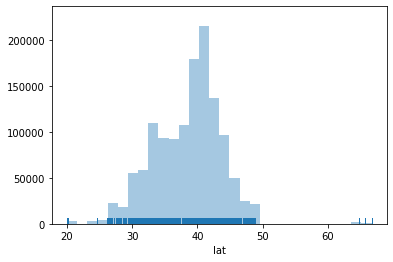

In [18]:
# Histogramas (kde : dibuja la linea entre las barras, rug: muestra concentracion encima de barras)
import seaborn as sns
sns.distplot(df['lat'], bins=30, kde=False, rug=True)

#####  Funcion de Densidad de probabilidad

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

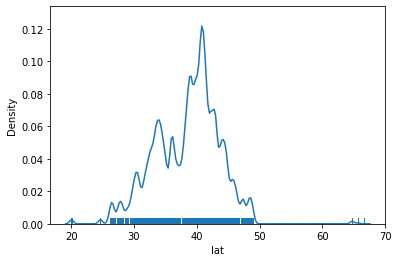

In [3]:
sns.distplot(df['lat'], hist=False, rug=True)

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


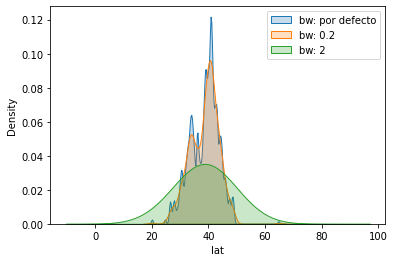

In [6]:
#Funcion de densidad usando KDEPLOT (bw : anco de banda , a mayor bw seria un Bin pequeño, y 
#abarca mas informacion en la curva
sns.kdeplot(df['lat'], label='bw: por defecto', shade=True)
sns.kdeplot(df['lat'], bw=0.2, label='bw: 0.2', shade=True)
sns.kdeplot(df['lat'], bw=2, label='bw: 2', shade=True)
plt.legend()

##### Funcion de Densidad (KDE) y Histograma juntos

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

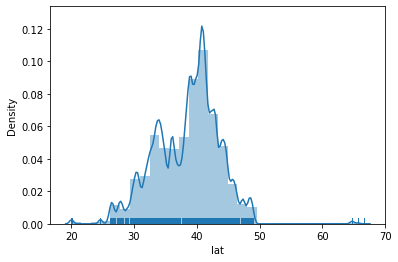

In [8]:
sns.distplot(df['lat'], bins=30, rug=True)

##### Grafica de probaibilidad Acumulada

<AxesSubplot:xlabel='lat', ylabel='Density'>

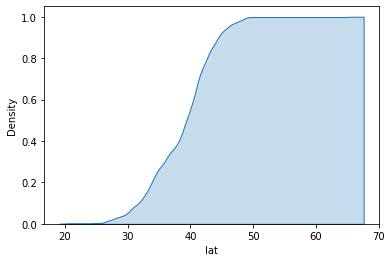

In [9]:
sns.kdeplot(df['lat'], cumulative=True, shade=True)

##### Curva de probabilidad acumulada de varios Meses

<function matplotlib.pyplot.legend(*args, **kwargs)>

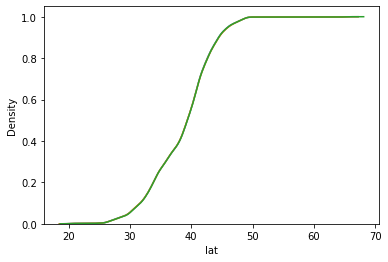

In [19]:
for x in df.query("Month in [1,2,3]")['Month'].unique().tolist():
    sns.kdeplot(df[df['Month'] == x]['lat'], cumulative=True, label=x)
plt.legend

##### Diagrama de cajas varibleNumerica  unitaria

<AxesSubplot:>

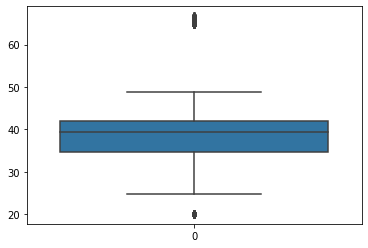

In [16]:
sns.boxplot(data=df['lat'], showfliers=True)

#### 1.4.2 Datos Categoricos y Analisis Bivariado

##### Grafico de Barras para variables categoricas (frecuencia de una variable categorica)

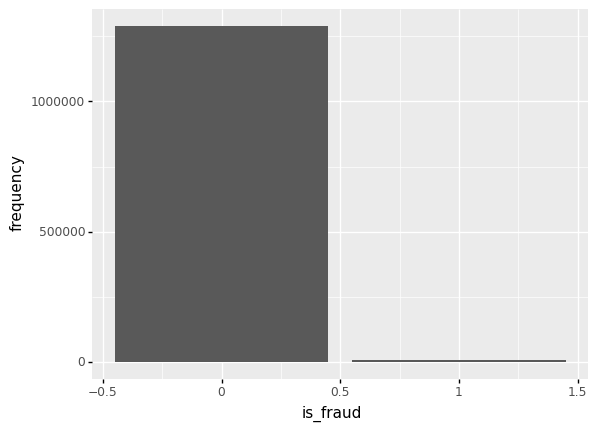

<ggplot: (-9223371906793470476)>

In [21]:
from plotnine import *

freq_by_species = (df 
  .groupby("is_fraud")
  .agg(frequency=("is_fraud", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "is_fraud", y = "frequency")) +
  geom_bar(stat = 'identity'))

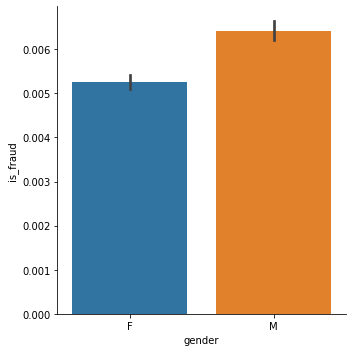

In [24]:
#Grafico de barras, para 2 variables categoricas
sns.catplot(x = "gender", y = "is_fraud", kind = "bar", data = df);

##### Graficas de Dispersion (2 Variables)

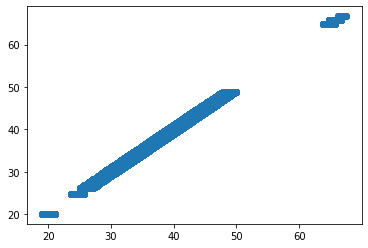

In [26]:
plt.scatter(df["merch_lat"], df["lat"])

<AxesSubplot:xlabel='amt', ylabel='lat'>

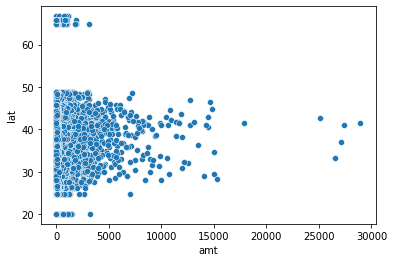

In [3]:
sns.scatterplot(data=df, x="amt", y="lat")
#sns.scatterplot(data=df, x="merch_lat", y="lat", hue="Year")

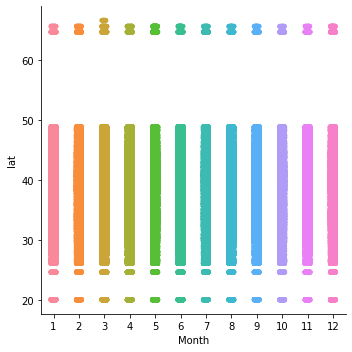

In [6]:
#Efecto Jitter: Muestra un mayor ancho en la grafica cuando concentra mayor data
#catplot: para variables categoricas
#No muy recomendable
sns.catplot(x="Month", y="lat", jitter=True, data=df)

##### Diagrama de Cajas para varibles Categoricas

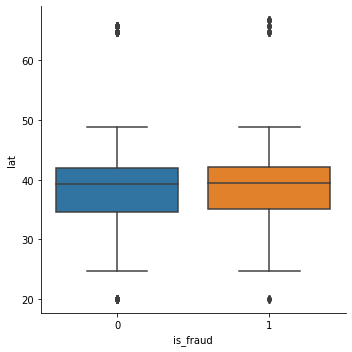

In [8]:
sns.catplot(x="is_fraud", y="lat", kind="box", data=df)

##### Diagrama de Violin Agrupados

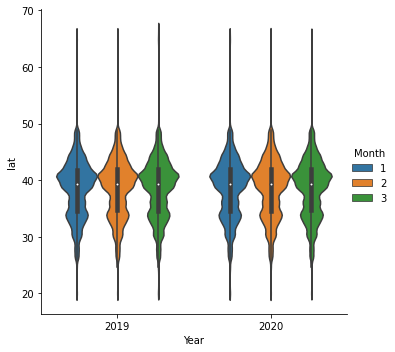

In [10]:
sns.catplot(x="Year", y="lat", hue="Month",  kind="violin", data=df.query("Month in [1,2,3] & Year in [2019,2020]"))

##### Grafico de barras Apiladas de 2 varibles categoricas

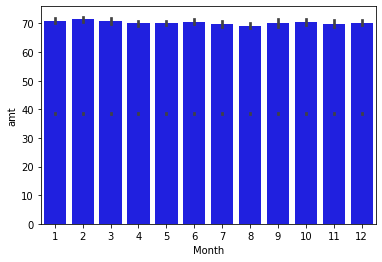

In [6]:
# Barras apiladas, para 3 variables en 2 lineas de codigo
s1 = sns.barplot(x = 'Month', y = 'lat', data = df, color = 'red')
s2 = sns.barplot(x = 'Month', y = 'amt', data = df, color = 'blue')

<AxesSubplot:xlabel='Month', ylabel='lat'>

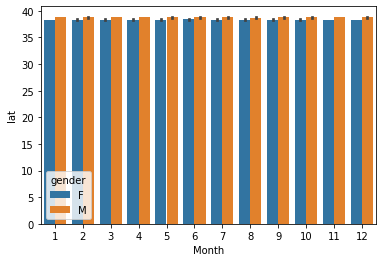

In [7]:
# Similar a apilar, pero pone las barras al costaoo
sns.barplot(x ="Month", y = 'lat', data = df, hue = "gender")

#### 1.4.4 Analisis Multivariado

##### Matriz de Correlacion

<AxesSubplot:>

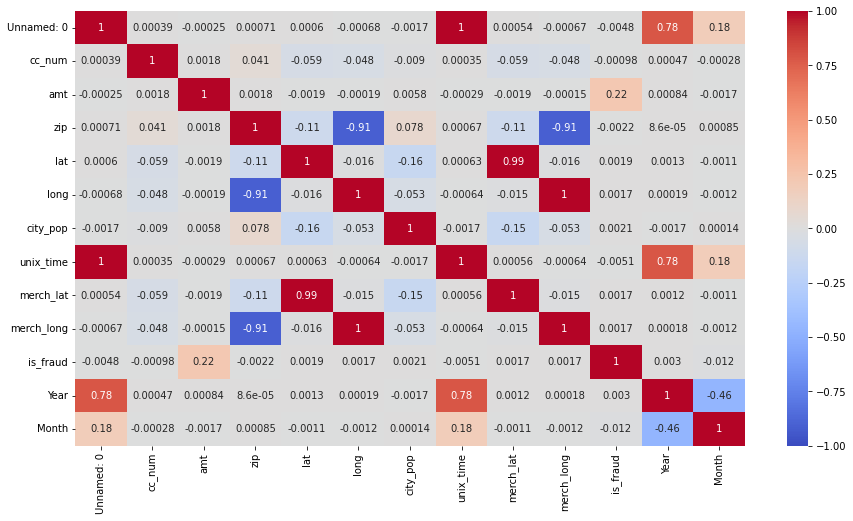

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

### 1.5 Summary Final de EDA

In [10]:
# La variable merch_long y zip, tienen una correlacion negativa fuerte,por ello una de ellas debe ser eliminada

## 2. PREPARACION DE DATOS

### 1.3 Formatear datos

In [10]:
#Formatear Fechas
def formatear_fecha(campo_fecha):
    column_fecha = pd.to_datetime(campo_fecha)
    change_column_fecha =  column_fecha.dt.strftime("%m/%d/%y")
    return change_column_fecha  
formatear_fecha(df["trans_date_trans_time"])

0          01/01/19
1          01/01/19
2          01/01/19
3          01/01/19
4          01/01/19
             ...   
1296670    06/21/20
1296671    06/21/20
1296672    06/21/20
1296673    06/21/20
1296674    06/21/20
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [4]:
df["trans_date_trans_time"]= pd.to_datetime(df["trans_date_trans_time"]) 
df['Year'] = df["trans_date_trans_time"].dt.year 
df['Month'] = df["trans_date_trans_time"].dt.month 
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

        city_pop                                job         dob  \
0           3495          Psychologist, counselling  1988-03-09   
1            149  Special educational needs teacher  1978-06-21   
2           4154        Nature conservation officer  1962-01-19   
3           1939                    Patent attorney  1967-01-12   
4             99     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
1296670      258                       Geoscientist  1961-11-24   
1296671      100   Production assistant, television  1979-12-11   
1296672      899                    Naval architect  1967-08-30   
1296673     1126              Volunteer coordinator  1980-08-18   
1296674      218           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841

In [5]:
# Formatear separador de cifras
column_amt = df['amt'].astype(str).str.replace('.', ',')
column_amt

C:\Users\Bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0            4,97
1          107,23
2          220,11
3            45,0
4           41,96
            ...  
1296670     15,56
1296671      51,7
1296672    105,93
1296673      74,9
1296674       4,3
Name: amt, Length: 1296675, dtype: object

### 1.4 Normalizacion, centrado y escalado

### Escalado de datos

In [8]:
#Importante para reducir el tiempo de convergencia al minimo local
from sklearn import preprocessing

columna_amt = df['amt'].values # Devuelve arreglo numpy
min_max_scaler = preprocessing.MinMaxScaler()
columna_amt_scaled = min_max_scaler.fit_transform(columna_amt.reshape(-1,1))
columna_amt_scaled

array([[0.00013714],
       [0.0036697 ],
       [0.00756912],
       ...,
       [0.00362479],
       [0.00255286],
       [0.000114  ]])

### Integracion de datos (columnas adicionales)

In [10]:
df_nuevo_dataset = pd.DataFrame(np.random.randint(0,1000,size=(100, 4)), columns=list('ABCD'))
df_nuevo_dataset['lat'] = df['lat'].sample(n=100).tolist()
df_nuevo_dataset

A    B    C    D      lat
0   701  692  701  719  37.2692
1   749  616  108  340  39.5483
2   623  739   39  475  37.6848
3    78  839   69  958  36.7558
4   726  749  857  858  33.9315
..  ...  ...  ...  ...      ...
95  296  459  327  989  32.8357
96  537  106  880   53  40.8798
97  698  208   84  649  31.9290
98  891  286  324  947  33.9349
99  628  937  823  140  31.9290

[100 rows x 5 columns]

In [13]:
df_final = pd.merge(df, df_nuevo_dataset, on='lat', how='left')
df_final

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1305326     1296670   2020-06-21 12:12:08       30263540414123   
1305327     1296671   2020-06-21 12:12:19     6011149206456997   
1305328     1296672   2020-06-21 12:12:32     3514865930894695   
1305329     1296673   2020-06-21 12:13:36     2720012583106919   
1305330     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1305326                    fraud_Reichel Inc  entertainment   15.56   
1305327             fraud_Abernathy and Sons    food_dining   51.70   
1305328                 fraud_Stiedemann Ltd    food_dining  105.93   
1305329  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1305330  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1305326         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1305327      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1305328  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1305329       Joseph     Murray      M           42933 Ryan Underpass  ...   
1305330      Jeffrey      Smith      M           135 Joseph Mountains  ...   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                               ...         ...        ...   
1305326  1961-11-24  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266   
1305327  1979-12-11  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881   
1305328  1967-08-30  483f52fe67fabef353d552c1e662974c  1371816752  33.619513   
1305329  1980-08-18  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940   
1305330  1995-08-16  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983   

         merch_long  is_fraud      A      B      C      D  
0        -82.048315         0    NaN    NaN    NaN    NaN  
1       -118.186462         0    NaN    NaN    NaN    NaN  
2       -112.154481         0    NaN    NaN    NaN    NaN  
3       -112.561071         0    NaN    NaN    NaN    NaN  
4        -78.632459         0  644.0  594.0  229.0  289.0  
...             ...       ...    ...    ...    ...    ...  
1305326 -111.690765         0    NaN    NaN  

### 1.5 Discretizacion y One-Hot-Encoding

#### One-Hot-Encoding

In [16]:
y = pd.get_dummies(df['category'], prefix='1HotEnc')
y

1HotEnc_entertainment  1HotEnc_food_dining  1HotEnc_gas_transport  \
0                            0                    0                      0   
1                            0                    0                      0   
2                            1                    0                      0   
3                            0                    0                      1   
4                            0                    0                      0   
...                        ...                  ...                    ...   
1296670                      1                    0                      0   
1296671                      0                    1                      0   
1296672                      0                    1                      0   
1296673                      0                    1                      0   
1296674                      0                    1                      0   

         1HotEnc_grocery_net  1HotEnc_grocery_pos  1HotEnc_health_fitness  \
0                          0                    0                       0   
1                          0                    1                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   
...                      ...                  ...                     ...   
1296670                    0                    0                       0   
1296671                    0                    0                       0   
1296672                    0                    0                       0   
1296673                    0                    0                       0   
1296674                    0                    0                       0   

         1HotEnc_home  1HotEnc_kids_pets  1HotEnc_misc_net  1HotEnc_misc_pos  \
0                   0                  0                 1                 0   
1                   0                  0                 0                 0   
2                   0                  0                 0                 0   
3                   0                  0                 0                 0   
4                   0                  0                 0                 1   
...               ...                ...               ...               ...   
1296670             0                  0                 0                 0   
1296671             0                  0                 0                 0   
1296672             0                  0                 0                 0   
1296673             0                  0                 0                 0   
1296674             0                  0                 0                 0   

         1HotEnc_personal_care  1HotEnc_shopping_net  1HotEnc_shopping_pos  \
0                            0                     0                     0   
1                            0                     0                     0   
2                            0                     0                     0   
3                            0                     0                     0   
4                            0                     0                     0   
...                        ...                   ...                   ...   
1296670                      0                     0                     0   
1296671                      0                     0                     0   
1296672                      0                     0                     0   
1296673                      0                     0                     0   
1296674                      0                     0                     0   

         1HotEnc_travel  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1296670               0  
1296671               0  
1296672        

#### Discretizacion de Variable Continua (Generar data en rangos)

In [18]:
df.lat

0          36.0788
1          48.8878
2          42.1808
3          46.2306
4          38.4207
            ...   
1296670    37.7175
1296671    39.2667
1296672    32.9396
1296673    43.3526
1296674    45.8433
Name: lat, Length: 1296675, dtype: float64

In [20]:
pd.qcut(df.lat, 3, labels=["Bajo", "Medio", "Alto"])

0           Bajo
1           Alto
2           Alto
3           Alto
4          Medio
           ...  
1296670    Medio
1296671    Medio
1296672     Bajo
1296673     Alto
1296674     Alto
Name: lat, Length: 1296675, dtype: category
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']

In [10]:
X = df.loc[:, ['ID_CLIENT','SEX','AGE', 'AREA_CODE_RESIDENCIAL_PHONE','PAYMENT_DAY']]
X.head()

ID_CLIENT SEX  AGE  AREA_CODE_RESIDENCIAL_PHONE  PAYMENT_DAY
0          2   F   18                           31           20
1          4   F   47                           31           25
2          5   F   28                           31           25
3          6   M   26                           31           28
4          7   F   22                           31           12

In [11]:
X = pd.concat([X, pd.get_dummies(X['SEX'],prefix='1HotEnc')], axis=1)
X = X.drop(['SEX'], axis=1)
X

ID_CLIENT  AGE  AREA_CODE_RESIDENCIAL_PHONE  PAYMENT_DAY  1HotEnc_F  \
0              2   18                           31           20          1   
1              4   47                           31           25          1   
2              5   28                           31           25          1   
3              6   26                           31           28          0   
4              7   22                           31           12          1   
...          ...  ...                          ...          ...        ...   
39995      49994   29                           31           12          0   
39996      49995   20                           31           20          1   
39997      49996   21                           31           12          0   
39998      49998   23                           31           28          1   
39999      50000   29                           31           23          0   

       1HotEnc_M  
0              0  
1              0  
2              0  
3              1  
4              0  
...          ...  
39995          1  
39996          0  
39997          1  
39998          0  
39999          1  

[40000 rows x 6 columns]

In [41]:
#var_s = {'F':0, 'M':1}
#X['SEX'] = X['SEX'].map(var_s)
#X.head()

In [12]:
Y = df.loc[:, ['TARGET_LABEL_BAD=1']]
Y.head()

TARGET_LABEL_BAD=1
0                   0
1                   0
2                   0
3                   0
4                   0

In [13]:
X = np.asarray(X)
Y = np.asarray(Y)

X.shape, Y.shape

((40000, 6), (40000, 1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((32000, 6), (32000, 1), (8000, 6), (8000, 1))

## MLP Hyperparameters

In [16]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))  # input_shape=(None,5)
model.add(Dense(1,activation='sigmoid'))

### MLP Hyperparameters

In [17]:
model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [19]:
#entrenar modelo
model.fit(X_train,y_train,epochs=30, verbose=1,batch_size=2000)

Epoch 1/30
16/16 [==============================] - 6s 18ms/step - loss: 326.3026 - accuracy: 0.8021
Epoch 2/30
16/16 [==============================] - 0s 13ms/step - loss: 199.1865 - accuracy: 0.8021
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 75.1272 - accuracy: 0.8020
Epoch 4/30
16/16 [==============================] - 0s 9ms/step - loss: 15.8567 - accuracy: 0.6205
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 5.6047 - accuracy: 0.7196
Epoch 6/30
16/16 [==============================] - 0s 9ms/step - loss: 1.8036 - accuracy: 0.7048
Epoch 7/30
16/16 [==============================] - 0s 9ms/step - loss: 0.9584 - accuracy: 0.7153
Epoch 8/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6721 - accuracy: 0.7396
Epoch 9/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6445 - accuracy: 0.7422
Epoch 10/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6379 - accuracy: 0.7434
Epoch 11

In [20]:
loss, accuracy = model.evaluate(X_test,y_test,verbose=1)

250/250 [==============================] - 3s 8ms/step - loss: 0.7997 - accuracy: 0.8040


In [21]:
model.save('creditscoring_model.h5')

## Matriz de Confusion 

In [22]:
predictions = model.predict(X_test)
predictions = predictions.round().astype(int)
print(classification_report(y_test,predictions))


250/250 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6432
           1       0.00      0.00      0.00      1568

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.45      8000
weighted avg       0.65      0.80      0.72      8000



C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Prediccion de Datos nuevos

In [27]:
x_p=np.asarray([19,9,8,0,1,0]).reshape(1,-1)
prediccion=model.predict(x_p)
prediccion

1/1 [==============================] - 0s 78ms/step


array([[0.29135782]], dtype=float32)

In [28]:
prediccion_final=prediccion.round().astype(int)
prediccion_final

array([[0]])